# Code Implementation/ Validation on Small Scale

# 1. Setup and Data Preparation

Let's start by setting up the environment and preparing the data. For this demonstration, we'll use synthetic data to mimic real-world sales data and supplier information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import random

# Seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate synthetic sales data
dates = pd.date_range(start='2023-01-01', end='2023-12-31')
sales_data = {
    'date': dates,
    'sales': np.random.poisson(lam=100, size=len(dates))
}

sales_df = pd.DataFrame(sales_data)

# Generate synthetic supplier information
supplier_data = {
    'supplier_id': [f'S{i}' for i in range(1, 11)],
    'sustainability_score': np.random.uniform(0, 1, 10),
    'delivery_time': np.random.randint(1, 10, 10),
    'price_per_unit': np.random.uniform(10, 50, 10)
}

suppliers_df = pd.DataFrame(supplier_data)

# Display the data
print("Sales Data:")
print(sales_df.head())
print("\nSuppliers Data:")
print(suppliers_df.head())


Sales Data:
        date  sales
0 2023-01-01     96
1 2023-01-02    107
2 2023-01-03     88
3 2023-01-04    103
4 2023-01-05    111

Suppliers Data:
  supplier_id  sustainability_score  delivery_time  price_per_unit
0          S1              0.400763              7       17.844524
1          S2              0.559640              7       30.220315
2          S3              0.155240              2       33.801959
3          S4              0.181928              7       23.570850
4          S5              0.861786              8       32.777741


# 2. Exploratory Data Analysis (EDA)

perform some basic EDA to understand our sales data.

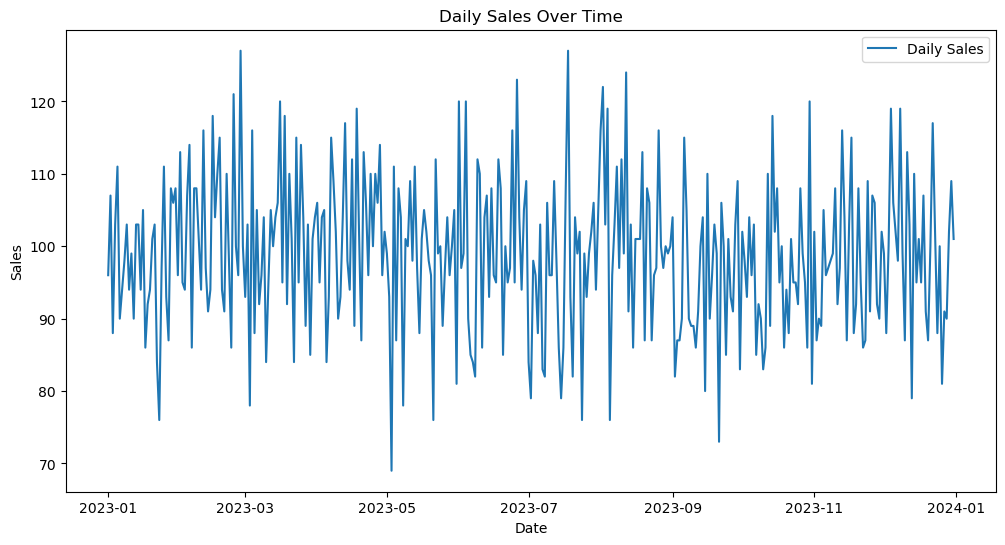

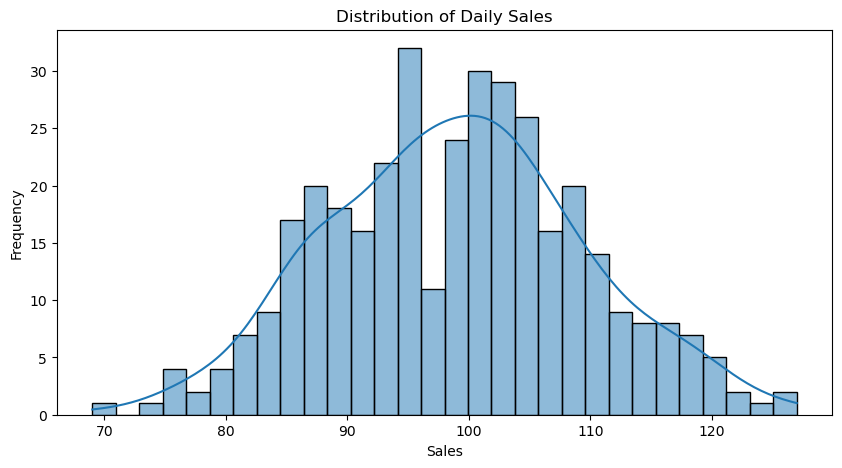

In [2]:
# Sales data EDA
plt.figure(figsize=(12, 6))
plt.plot(sales_df['date'], sales_df['sales'], label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Distribution of sales
plt.figure(figsize=(10, 5))
sns.histplot(sales_df['sales'], bins=30, kde=True)
plt.title('Distribution of Daily Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


# 3. Simple ML Modelling for Demand Prediction

use a simple linear regression model to predict daily sales based on historical data.

Train MAE: 8.395585225507546
Test MAE: 8.018172329620569


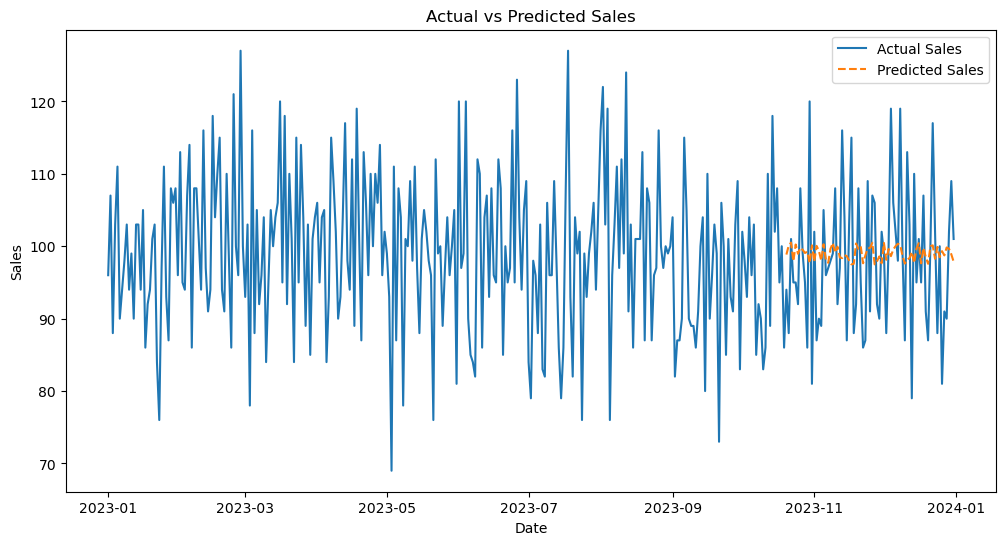

In [3]:
# Feature Engineering
sales_df['day_of_week'] = sales_df['date'].dt.dayofweek
sales_df['month'] = sales_df['date'].dt.month

# Prepare the data for training
X = sales_df[['day_of_week', 'month']]
y = sales_df['sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(sales_df['date'], sales_df['sales'], label='Actual Sales')
plt.plot(sales_df['date'].iloc[len(X_train):], y_pred_test, label='Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# 4. Supplier Recommendation Based on Sustainability

Recommend the top 3 suppliers based on their sustainability score.

In [4]:
# Recommend top 3 suppliers based on sustainability score
top_suppliers = suppliers_df.sort_values(by='sustainability_score', ascending=False).head(3)
print("Top 3 Sustainable Suppliers:")
print(top_suppliers)


Top 3 Sustainable Suppliers:
  supplier_id  sustainability_score  delivery_time  price_per_unit
5          S6              0.946115              1       45.498419
4          S5              0.861786              8       32.777741
8          S9              0.644000              3       42.212599


# 5. Inventory Optimization

A simple rule-based inventory optimization approach where we maintain a safety stock and reorder when below a threshold.

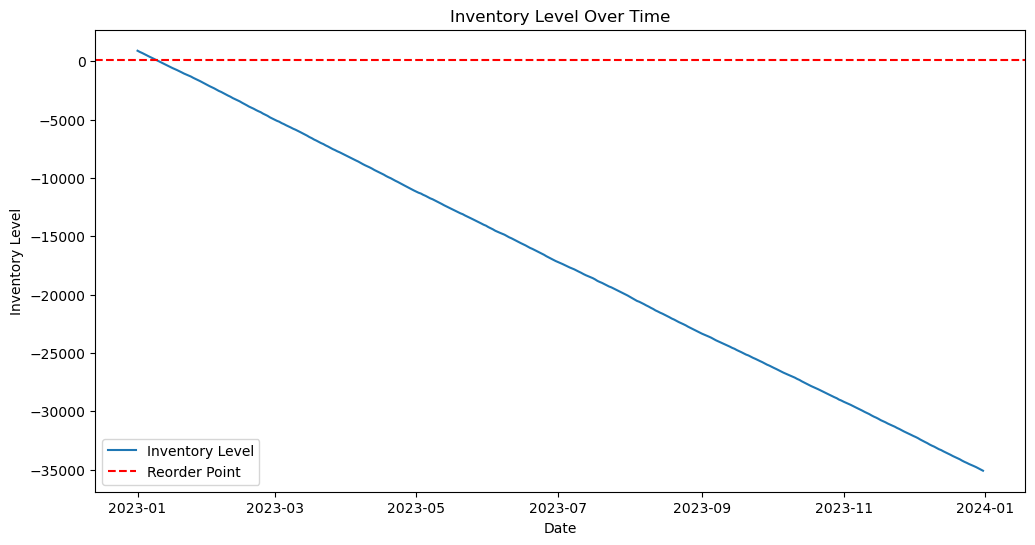

Inventory Status:
         date  sales  inventory_level reorder
0  2023-01-01     96              904      No
1  2023-01-02    107              797      No
2  2023-01-03     88              709      No
3  2023-01-04    103              606      No
4  2023-01-05    111              495      No
5  2023-01-06     90              405      No
6  2023-01-07     94              311      No
7  2023-01-08     98              213      No
8  2023-01-09    103              110      No
9  2023-01-10     94               16     Yes
10 2023-01-11     99              -83     Yes
11 2023-01-12     90             -173     Yes
12 2023-01-13    103             -276     Yes
13 2023-01-14    103             -379     Yes
14 2023-01-15     94             -473     Yes
15 2023-01-16    105             -578     Yes
16 2023-01-17     86             -664     Yes
17 2023-01-18     92             -756     Yes
18 2023-01-19     94             -850     Yes
19 2023-01-20    101             -951     Yes


In [5]:
# Inventory data simulation
sales_df['cumulative_sales'] = sales_df['sales'].cumsum()
initial_stock = 1000
reorder_point = 100
reorder_quantity = 500
current_stock = initial_stock

# Inventory tracking
sales_df['inventory_level'] = initial_stock - sales_df['cumulative_sales']
sales_df['reorder'] = sales_df['inventory_level'].apply(lambda x: 'Yes' if x < reorder_point else 'No')

# Plot inventory level
plt.figure(figsize=(12, 6))
plt.plot(sales_df['date'], sales_df['inventory_level'], label='Inventory Level')
plt.axhline(y=reorder_point, color='r', linestyle='--', label='Reorder Point')
plt.title('Inventory Level Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.legend()
plt.show()

# Display inventory status
print("Inventory Status:")
print(sales_df[['date', 'sales', 'inventory_level', 'reorder']].head(20))
